# 📢 File explanation!!


# 🎯 **Step 0: Import library**
---

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras import layers, models, optimizers, callbacks, metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Bidirectional, ELU, LSTM, Activation, Dense, Dropout, Input, Embedding, Concatenate, Dense, Conv1D, AveragePooling1D, MaxPooling1D, Flatten, Dropout

In [2]:
plt.style.use('seaborn')

<ipython-input-2-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 🎯 **Step 1: Load Dataset**
---

In [4]:
path = '/content/drive/MyDrive/SKILL ACADEMY/FINAL PROJECT/Dataset/URL/combined_dataset_url_after_preprocess_v2.csv'

df_url = pd.read_csv(path)

df_url.head()

,Category,URL,clean_URL,clean_URL_sentence
0,phishing,logtelstra2021.ddnsking.com/0dfa1b53b835500696...,"['logtelstra2021', 'ddnsking', 'com', '0dfa1b5...",logtelstra2021 ddnsking com 0dfa1b53b835500696...
1,phishing,dvsber.ru/modules/mod_ariimageslidersa/KRENK3N...,"['dvsber', 'ru', 'module', 'mod', 'ariimagesli...",dvsber ru module mod ariimageslidersa krenk3n4...
2,phishing,kimsinc564.000webhostapp.com/notification.php?...,"['kimsinc564', '000webhostapp', 'com', 'notifi...",kimsinc564 000webhostapp com notification php ...
3,phishing,benjim.com/all,"['benjim', 'com']",benjim com
4,phishing,www.m.micesrunescape.com-we.ru/,"['micesrunescape', 'com', 'ru']",micesrunescape com ru


# 🎯 **Step 2: Split data into feature and label**
---

In [5]:
# X_char = df_url['clean_URL_char_sentence']
# X_word = df_url['clean_URL_word_sentence']
X = df_url['clean_URL_sentence']

y = df_url['Category']

# 🎯 **Step 3: Processing X**
---

## ✨ 3.1 - Tokenizing and Padding

Char Level

In [6]:
X = [str(url) for url in X]

tokenizer_char_level = Tokenizer(num_words=None, oov_token='<OOV>', char_level=True)
tokenizer_char_level.fit_on_texts(X)
X_sequences_char_level = tokenizer_char_level.texts_to_sequences(X)
X_padded_char_level = pad_sequences(X_sequences_char_level, padding='post', truncating='post', maxlen=2000)

# Build vocabulary
vocab_size_char_level = len(tokenizer_char_level.word_index) + 1

X_padded_char_level

array([[13,  4, 17, ...,  0,  0,  0],
       [15, 24, 12, ...,  0,  0,  0],
       [22,  7,  9, ...,  0,  0,  0],
       ...,
       [ 6,  3, 11, ...,  0,  0,  0],
       [ 6,  3, 11, ...,  0,  0,  0],
       [12, 14, 23, ...,  0,  0,  0]], dtype=int32)

In [7]:
vocab_size_char_level

39

In [8]:
len(tokenizer_char_level.word_index)

38

Word Level

In [9]:
tokenizer_word_level = Tokenizer(num_words=None, oov_token='<OOV>')
tokenizer_word_level.fit_on_texts(X)
X_sequences_word_level = tokenizer_word_level.texts_to_sequences(X)
X_padded_word_level = pad_sequences(X_sequences_word_level, padding='post', truncating='post', maxlen=2000)

# Build vocabulary
vocab_size_word_level = len(tokenizer_word_level.word_index) + 1

X_padded_word_level

array([[  2318,   2034,      2, ...,      0,      0,      0],
       [  4813,     13,    492, ...,      0,      0,      0],
       [ 52449,    101,      2, ...,      0,      0,      0],
       ...,
       [314238,      2,      0, ...,      0,      0,      0],
       [314239,      2,      0, ...,      0,      0,      0],
       [314240,     20,      0, ...,      0,      0,      0]], dtype=int32)

In [10]:
vocab_size_word_level

314241

In [11]:
len(tokenizer_word_level.word_index)

314240

# 🎯 **Step 4: Processing y**
---

In [12]:
position_mapping = {'phishing': 1, 'non-phishing': 0}

y = y.map(position_mapping)

y

0         1
1         1
2         1
3         1
4         1
         ..
312477    0
312478    0
312479    0
312480    0
312481    0
Name: Category, Length: 312482, dtype: int64

# 🎯 **Step 5: Split data into train and test**
---

In [13]:
X_padded_cl_train, X_padded_cl_test, X_padded_wl_train, X_padded_wl_test, y_train, y_test = train_test_split(X_padded_char_level, X_padded_word_level, y, test_size=0.25, random_state=42)


In [14]:
len(X_padded_cl_train), len(X_padded_wl_train)

(234361, 234361)

In [15]:
X_padded_cl_train.shape, X_padded_wl_train.shape

((234361, 2000), (234361, 2000))

In [16]:
Counter(y_train)

Counter({1: 117404, 0: 116957})

# 🎯 **Step 5: Create model**
---

In [17]:
# from tensorflow.keras.layers import Layer
# from tensorflow.keras import backend as K, initializers, regularizers, constraints


# class Attention_layer(Layer):
#     """
#         Attention operation, with a context/query vector, for temporal data.
#         Supports Masking.
#         Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
#         "Hierarchical Attention Networks for Document Classification"
#         by using a context vector to assist the attention
#         # Input shape
#             3D tensor with shape: `(samples, steps, features)`.
#         # Output shape
#             2D tensor with shape: `(samples, features)`.
#         :param kwargs:
#         Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
#         The dimensions are inferred based on the output shape of the RNN.
#         Example:
#             model.add(LSTM(64, return_sequences=True))
#             model.add(AttentionWithContext())
#         """

#     def __init__(self,
#                  W_regularizer=None, b_regularizer=None,
#                  W_constraint=None, b_constraint=None,
#                  bias=True, **kwargs):

#         self.supports_masking = True
#         self.init = initializers.get('glorot_uniform')

#         self.W_regularizer = regularizers.get(W_regularizer)
#         self.b_regularizer = regularizers.get(b_regularizer)

#         self.W_constraint = constraints.get(W_constraint)
#         self.b_constraint = constraints.get(b_constraint)

#         self.bias = bias
#         super(Attention_layer, self).__init__(**kwargs)

#     # def build(self, input_shape):
#     #     assert len(input_shape) == 3

#     #     self.W = self.add_weight((input_shape[-1], input_shape[-1],),
#     #                              initializer=self.init,
#     #                              name='{}_W'.format(self.name),
#     #                              regularizer=self.W_regularizer,
#     #                              constraint=self.W_constraint)
#     #     if self.bias:
#     #         self.b = self.add_weight((input_shape[-1],),
#     #                                  initializer='zero',
#     #                                  name='{}_b'.format(self.name),
#     #                                  regularizer=self.b_regularizer,
#     #                                  constraint=self.b_constraint)

#     #     super(Attention_layer, self).build(input_shape)

#     def build(self, input_shape):
#         assert len(input_shape) == 3

#         self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),
#                                 initializer=self.init,
#                                 name='{}_W'.format(self.name),  # Hanya satu kali penambahan argumen name
#                                 regularizer=self.W_regularizer,
#                                 constraint=self.W_constraint)
#         if self.bias:
#             self.b = self.add_weight(shape=(input_shape[-1],),
#                                     initializer='zero',
#                                     name='{}_b'.format(self.name),
#                                     regularizer=self.b_regularizer,
#                                     constraint=self.b_constraint)

#         super(Attention_layer, self).build(input_shape)

#     def compute_mask(self, input, input_mask=None):
#         # do not pass the mask to the next layers
#         return None

#     def call(self, x, mask=None):
#         uit = K.dot(x, self.W)

#         if self.bias:
#             uit += self.b

#         uit = K.tanh(uit)

#         a = K.exp(uit)

#         # apply mask after the exp. will be re-normalized next
#         if mask is not None:
#             # Cast the mask to floatX to avoid float64 upcasting in theano
#             a *= K.cast(mask, K.floatx())

#         # in some cases especially in the early stages of training the sum may be almost zero
#         # and this results in NaN's. A workaround is to add a very small positive number to the sum.
#         # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
#         a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
#         # print (a)
#         # a = K.expand_dims(a)
#         # print(x)
#         weighted_input = x * a
#         # print(weighted_input)
#         return K.sum(weighted_input, axis=1)

#     def compute_output_shape(self, input_shape):
#         return (input_shape[0], input_shape[-1])

In [18]:
# epochs = 10             #epochs
# batch_size = 64         #batch
# lstm_output_size=128    #LSTM Unit
# Embedding_dim=128       #dimension
# lr=1e-4                 #Learning Rate
# kernel_size=5           #CNN kernel_size
# filters=256             #CNN filters
# pool_size=4             #CNN pool_size

In [19]:
# def lstm_conv(emb_dim=Embedding_dim, lstm_output_size=lstm_output_size, W_reg=regularizers.l2(1e-4)):
#     # Input url_char
#     input_url_char = Input(shape=(X_padded_cl_train.shape[1],), dtype='int32', name='url_char_input')
#     # Embedding layer
#     emb_url_char = Embedding(input_dim=min(6500, len(tokenizer_char_level.word_index) + 1), output_dim=emb_dim, input_length=X_padded_cl_train.shape[1], embeddings_regularizer=W_reg)(input_url_char)

#     #input url_word
#     input_url_word = Input(shape=(X_padded_wl_train.shape[1],), dtype='int32', name='url_word_input')
#     # Embedding layer
#     emb_url_word = Embedding(input_dim=min(6500, len(tokenizer_word_level.word_index) + 1), output_dim=emb_dim, input_length=X_padded_cl_train.shape[1], embeddings_regularizer=W_reg)(input_url_word)

#     #url_char_model
#     emb_url_char = Dropout(0.5)(emb_url_char)
#     conv1 = Conv1D(kernel_size=10, filters=128, activation='relu')(emb_url_char)
#     conv1 = ELU()(conv1)
#     conv1 = MaxPooling1D(pool_size = 2)(conv1)
#     conv1 = Dropout(0.5)(conv1)
#     lstm1 = Bidirectional(LSTM(lstm_output_size, return_sequences=True))(conv1)

#     lstm1= Dropout(0.3)(lstm1)
#     lstm1 = Attention_layer()(lstm1)

#     # url_word_model

#     emb_url_word = Dropout(0.5)(emb_url_word)
#     conv2 = Conv1D(kernel_size=10, filters=128, activation='relu')(emb_url_word)
#     conv2 = ELU()(conv2)
#     conv2 = MaxPooling1D(pool_size=2)(conv2)
#     conv2 = Dropout(0.5)(conv2)
#     lstm2 = Bidirectional(LSTM(lstm_output_size, return_sequences=True))(conv2)

#     lstm2 = Dropout(0.3)(lstm2)
#     lstm2 = Attention_layer()(lstm2)

#     #concatenate
#     #concatenate
#     x_url_output = Concatenate(axis=1)([lstm1, lstm2])

#     #x_url_output = Dense(128, activation='relu')(x_url_output)

#     # print('x.shape',x.shape)
#     #x=Flatten()(x)
#     x=Dense(256, activation='relu')(x_url_output)
#     x=Dense(128, activation='relu')(x)
#     x=Dense(64, activation='relu')(x)
#     # print('x.shape', x.shape)
#     output = Dense(1, activation='sigmoid', name='output')(x)

#     # Compile model and define optimizer
#     model = Model(inputs=[input_url_char, input_url_word], outputs=[output])

#     # adam = Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#     adam = Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#     model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
#     return model

In [20]:
max_url_length = 500
max_words = 6500
embedding_dim = 32
kernel_size = 10
conv_filters = 128
learning_rate = 0.0005
dense_units_1 = 128
dense_units_2 = 64

def create_model():
    # Adjusted hyperparameters
    embedding_dim = 32  # Increased embedding dimension
    conv_filters = 128  # Increased number of filters in convolutional layers
    kernel_size = 10 # Increased kernel size
    dense_units_1 = 128
    dense_units_2 = 64
    learning_rate = 0.0005  # Adjusted learning rate

    # Model architecture
    url_cl_input = layers.Input(shape=(max_url_length,), name='url_cl_input')
    url_cl_embedding = layers.Embedding(input_dim=min(max_words, len(tokenizer_char_level.word_index) + 1),
                                     output_dim=embedding_dim, input_length=max_url_length, name='url_cl_embedding')(url_cl_input)
    url_cl_conv1 = layers.Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu')(url_cl_embedding)
    url_cl_pool1 = layers.MaxPooling1D(pool_size=2)(url_cl_conv1)
    url_cl_conv2 = layers.Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu')(url_cl_pool1)
    url_cl_pool2 = layers.MaxPooling1D(pool_size=2)(url_cl_conv2)
    url_cl_conv3 = layers.Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu')(url_cl_pool2)
    url_cl_pool3 = layers.MaxPooling1D(pool_size=2)(url_cl_conv3)
    url_cl_flat = layers.Flatten()(url_cl_pool3)

    url_wl_input = layers.Input(shape=(max_url_length,), name='url_wl_input')
    url_wl_embedding = layers.Embedding(input_dim=min(max_words, len(tokenizer_word_level.word_index) + 1),
                                     output_dim=embedding_dim, input_length=max_url_length, name='url_wl_embedding')(url_wl_input)
    url_wl_conv1 = layers.Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu')(url_wl_embedding)
    url_wl_pool1 = layers.MaxPooling1D(pool_size=2)(url_wl_conv1)
    url_wl_conv2 = layers.Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu')(url_wl_pool1)
    url_wl_pool2 = layers.MaxPooling1D(pool_size=2)(url_wl_conv2)
    url_wl_conv3 = layers.Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu')(url_wl_pool2)
    url_wl_pool3 = layers.MaxPooling1D(pool_size=2)(url_wl_conv3)
    url_wl_flat = layers.Flatten()(url_wl_pool3)

    concatenated = layers.Concatenate(name='concatenate_layer')([url_cl_flat, url_wl_flat])
    dense1 = layers.Dense(dense_units_1, activation='relu', name='dense1')(concatenated)
    dense2 = layers.Dense(dense_units_2, activation='relu', name='dense2')(dense1)
    output = layers.Dense(1, activation='sigmoid', name='output_layer')(dense2)

    # Model compilation with directly imported metrics
    model = models.Model(inputs=[url_cl_input, url_wl_input], outputs=output)
    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy', Precision(), Recall()])

    return model

In [21]:
# Create the model
model = create_model()

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 url_cl_input (InputLayer)   [(None, 500)]                0         []                            
                                                                                                  
 url_wl_input (InputLayer)   [(None, 500)]                0         []                            
                                                                                                  
 url_cl_embedding (Embeddin  (None, 500, 32)              1248      ['url_cl_input[0][0]']        
 g)                                                                                               
                                                                                                  
 url_wl_embedding (Embeddin  (None, 500, 32)              208000    ['url_wl_input[0][0]']    

In [23]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(
    [X_padded_cl_train, X_padded_wl_train], y_train,
    epochs=5,
    batch_size=8,
    validation_data=([X_padded_cl_test, X_padded_wl_test], y_test),
    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)]
)

# # Model Training
# history = model.fit(
#     [url_X_train, html_X_train],  # URL and HTML training data
#     url_y_train,
#     validation_data=([url_X_test, html_X_test], url_y_test),  # URL and HTML validation data
#     epochs=25,  # Number of epochs to train for
#     batch_size=8,  # Batch size for training
#     callbacks=[early_stopping]  # Early stopping callback
# )

In [ ]:
model.save('/content/drive/MyDrive/URL_CNN_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


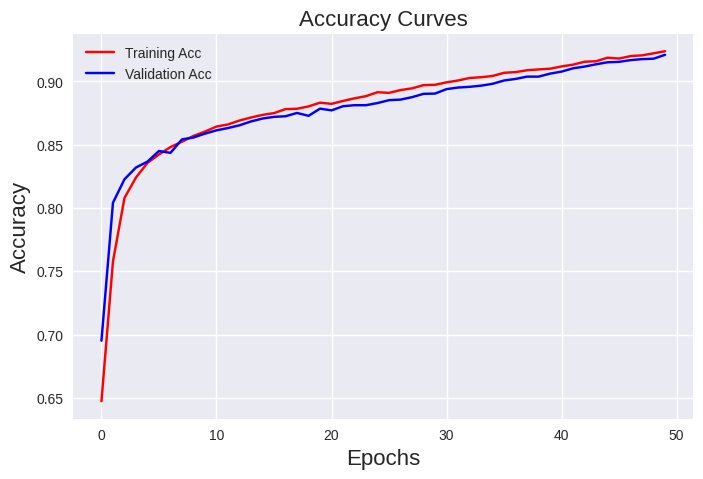

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

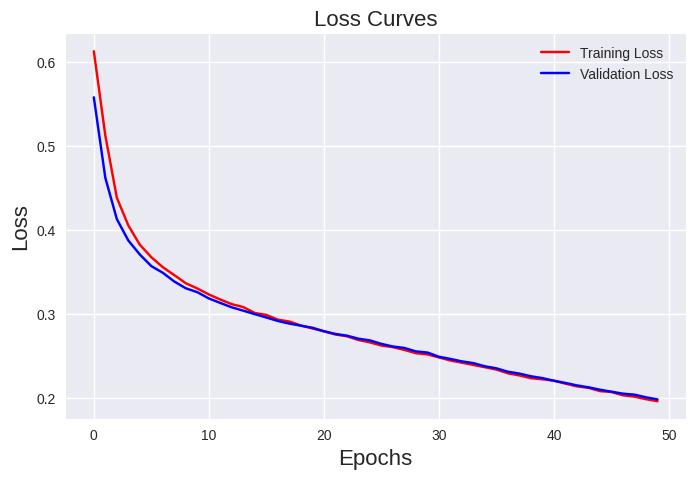

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.show()

In [ ]:
y_pred_prob = model.predict([X_url_test, X_extraction_test])
y_pred = (y_pred_prob > 0.5).astype(int)

276/276 [==============================] - 1s 3ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')

accuracy: 0.9210526315789473
precision: 0.9327772325809617
recall: 0.900094696969697
f1: 0.916144578313253


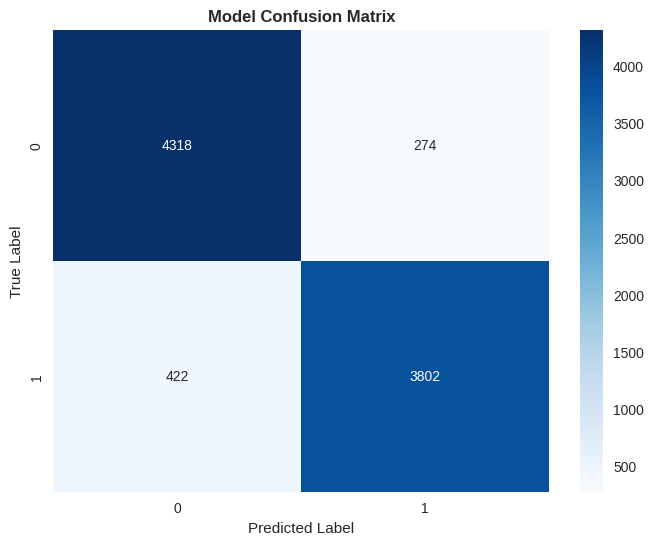

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Model Confusion Matrix", fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()